In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
input_data = pd.read_csv('./loan.csv')

### Understand the data

In [3]:
input_data.shape

(39717, 111)

In [4]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
input_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Data cleaning
- Fix rows
- Fix columns
- Fix missing values
- Standardize values
- Filter data

### Fix rows

In [6]:
# 1. Delete incorrect rows (unnecessary header & footer rows) -> This is not applicable to current dataset
# 2. Delete summary rows (Total & subtotal rows) -> This is not applicable to current dataset
# 3. Delete extra rows (column number indicator rows, blank rows)

input_data[input_data.isna().all(axis=1)] #### No blank rows in this dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


### Fix columns

In [7]:
# 1. Delete unnecessary / irrelevant columns

columns_with_no_data = input_data.columns[input_data.isna().all()].tolist()
loan_data = input_data.drop(columns_with_no_data, axis=1)

#### Remove columns that are irrelevant for analysis
##### policy_code -> For all rows, value is 1 (publicly available policy)
##### application_type -> For all rows, value is "INDIVIDUAL"
##### acc_now_delinq -> For all rows, value is 0
##### initial_list_status -> For all rows, value is 'f'
##### collections_12_mths_ex_med -> 99% of records has 0.0 as value and others are NA
##### chargeoff_within_12_mths -> Appx. 99% of records has 0.0 as value and others are NA
##### delinq_amnt -> For all rows, value is0
##### tax_liens -> Appx. 99% of records has 0.0 as value and other are NA
##### pymnt_plan -> For all rows, value is n
##### url -> Not relevant since loan id info is already present in a separate column
##### desc -> Not required since crisp info of this is present in column named purpose
##### title -> Not required since crisp info of this is present in column named purpose
##### mths_since_last_delinq -> Not so useful since ~65% of records are having na


irrelevant_columns = ['policy_code', 'application_type', 'acc_now_delinq', 'initial_list_status',
                      'collections_12_mths_ex_med','chargeoff_within_12_mths', 'delinq_amnt',
                      'tax_liens', 'pymnt_plan', 'url', 'desc', 'title', 'mths_since_last_delinq']
loan_data.drop(irrelevant_columns, axis=1, inplace=True)


### Fix missing values

In [8]:
# 1. Drop columns with significant no. of missing values (greater than 90%)
    
columns_to_be_dropped = loan_data.columns[(loan_data.isnull().sum() / len(loan_data) * 100) > 90]
loan_data.drop(columns_to_be_dropped, axis=1, inplace=True)

# 2. Drop rows if missing values in a column are less than or equal to 10%
columns_with_few_missing_values = loan_data.columns[((loan_data.isnull().sum() / len(loan_data) * 100) > 0) &
                                       ((loan_data.isnull().sum() / len(loan_data) * 100) <= 10)]
for col in columns_with_few_missing_values:
    loan_data = loan_data[loan_data[col].notna()]
    
# 3. Verify no missing values in any columns in dataframe
columns_with_na_values = loan_data.columns[loan_data.isnull().any()]
print(columns_with_na_values)


Index([], dtype='object')


### Standardize values

In [9]:
# Standardize values wherever applicable

# 1. Converting column of object type to int/float wherever applicable / needed for analysis

import re
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: pd.to_numeric(re.findall('\d+', str(x))[0]))

loan_data['term'] = loan_data['term'].apply(lambda x: pd.to_numeric(x.replace(' months', '')))
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.replace('%', '')))

# Renaming columns for better understanding
loan_data.rename(columns = { 'term': 'term_in_months', 'int_rate': 'int_rate_percent'}, inplace=True)


# 2. Create derived columns

# 2.a Data type driven metrics (split columns for more data)
## To analyze if loan defaulters are specific to a month / year
loan_data['issue_d_month'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y').dt.month_name()
loan_data['issue_d_year'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y').dt.year

loan_data['last_pymnt_d_month'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y').dt.month_name()
loan_data['last_pymnt_d_year'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y').dt.year

loan_data['last_credit_pull_d_month'] = pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y').dt.month_name()
loan_data['last_credit_pull_d_year'] = pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y').dt.year

# 2.b Business driven metrics
# Getting an idea of how the consumer finance comapny peforms
loan_data['is_profit'] = loan_data['total_pymnt'] > loan_data['funded_amnt']


### Filter data

In [10]:
# Filter data using loan status
print(loan_data['loan_status'].value_counts())

# As the use case is to identify factors that creates charged-off, loan that are in current is not required
# Hence, drop those records
loan_data = loan_data[loan_data['loan_status'] != 'Current']

Fully Paid     30432
Charged Off     4944
Current         1066
Name: loan_status, dtype: int64


In [11]:
loan_data.shape

(35376, 49)

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35376 entries, 1 to 39680
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        35376 non-null  int64  
 1   member_id                 35376 non-null  int64  
 2   loan_amnt                 35376 non-null  int64  
 3   funded_amnt               35376 non-null  int64  
 4   funded_amnt_inv           35376 non-null  float64
 5   term_in_months            35376 non-null  int64  
 6   int_rate_percent          35376 non-null  float64
 7   installment               35376 non-null  float64
 8   grade                     35376 non-null  object 
 9   sub_grade                 35376 non-null  object 
 10  emp_title                 35376 non-null  object 
 11  emp_length                35376 non-null  int64  
 12  home_ownership            35376 non-null  object 
 13  annual_inc                35376 non-null  float64
 14  verifi

## Data analysis
- Univariate analysis
    - Quantitative
    - Categorical
- Segmented univariate
- Bivariate analysis

### Univariate analysis - Quantitative

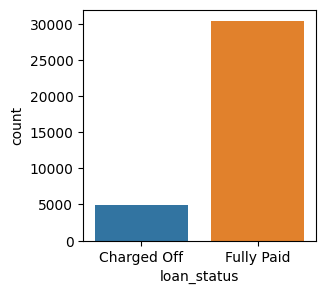

In [13]:
#1. Analyzing target column - loan_status

plt.figure(figsize=[3,3])
sns.countplot(data=loan_data, x='loan_status')
plt.show()

#### Inference: Appx. 14% of loan records are defaulters and others are fully paid. This tells us that there's a skew in dataset

0.25     5500.0
0.50    10000.0
0.75    15000.0
0.80    16000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

Before removing outliers


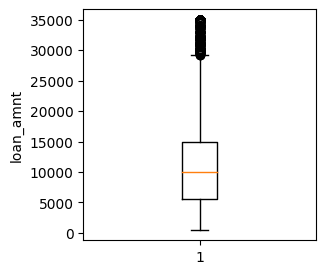

After removing outliers


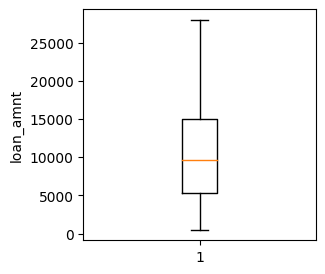

Shape of loan data: (34324, 49)


In [14]:
#2. Removing outliers - loan_amnt

print(loan_data['loan_amnt'].quantile([0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.97, 0.98, 0.99]))

def show_box_plot(df_col):
    plt.figure(figsize=[3,3])
    plt.ylabel(df_col.name)
    plt.boxplot(df_col)
    plt.show()

def remove_outliers(df, col, quantile_value):
    df = df[df[col] <= quantile_value]
    return df

print('\nBefore removing outliers')
show_box_plot(loan_data['loan_amnt'])

loan_data = remove_outliers(loan_data, 'loan_amnt', loan_data['loan_amnt'].quantile(0.97))

print('After removing outliers')
show_box_plot(loan_data['loan_amnt'])
print("Shape of loan data: " + str(loan_data.shape))

0.25     8.94
0.50    11.71
0.75    14.27
0.80    15.05
0.90    16.70
0.95    18.09
0.97    19.03
0.98    19.69
0.99    20.69
Name: int_rate_percent, dtype: float64

Before removing outliers


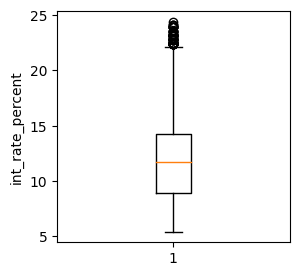

After removing outliers


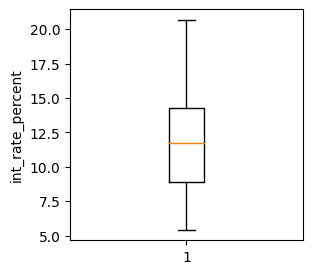

Shape of loan data: (33981, 49)


In [15]:
#3 - Removing outliers - int_rate_percent

print(loan_data['int_rate_percent'].quantile([0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.97, 0.98, 0.99]))

print('\nBefore removing outliers')
show_box_plot(loan_data['int_rate_percent'])

loan_data = remove_outliers(loan_data, 'int_rate_percent', loan_data['int_rate_percent'].quantile(0.99))

print('After removing outliers')
show_box_plot(loan_data['int_rate_percent'])
print("Shape of loan data: " + str(loan_data.shape))

0.25     40404.0
0.50     58000.0
0.75     80000.0
0.80     88000.0
0.90    110000.0
0.93    122400.0
0.94    128520.0
0.95    135000.0
0.99    210000.0
Name: annual_inc, dtype: float64

Before removing outliers


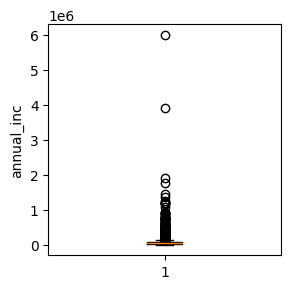

After removing outliers


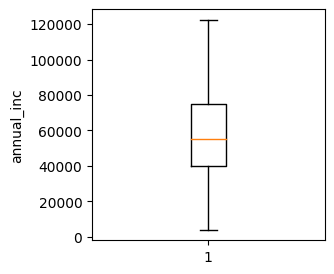

Shape of loan data: (31603, 49)


In [16]:
#4 - Removing outliers - annual_inc

print(loan_data['annual_inc'].quantile([0.25, 0.5, 0.75, 0.80, 0.90, 0.93, 0.94, 0.95, 0.99]))

print('\nBefore removing outliers')
show_box_plot(loan_data['annual_inc'])

loan_data = remove_outliers(loan_data, 'annual_inc', loan_data['annual_inc'].quantile(0.93))

print('After removing outliers')
show_box_plot(loan_data['annual_inc'])
print("Shape of loan data: " + str(loan_data.shape))

### Univariate analysis - Categorical

0.25    1244.5
0.50    4194.0
0.75    7517.5
0.80    8098.0
0.85    8616.0
0.90    9009.0
0.99    9716.4
Name: grade, dtype: float64


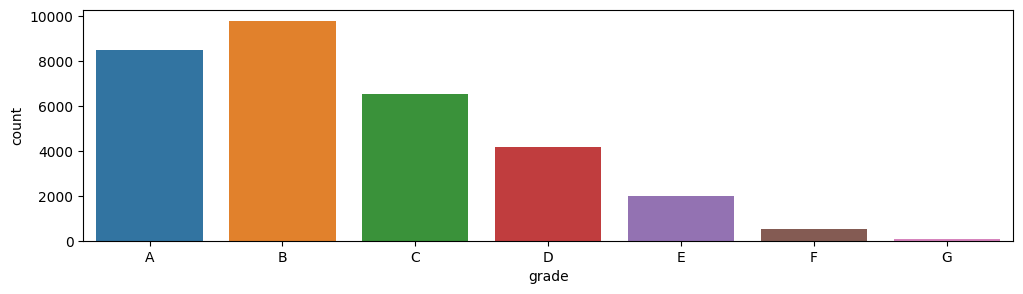

In [17]:
# Analyzing grade
print(loan_data['grade'].value_counts().quantile([0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.99]))
plt.figure(figsize=[12,3])
sns.countplot(data=loan_data, x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

#### Inference: Most of the loans have grade B followed by grade A and C

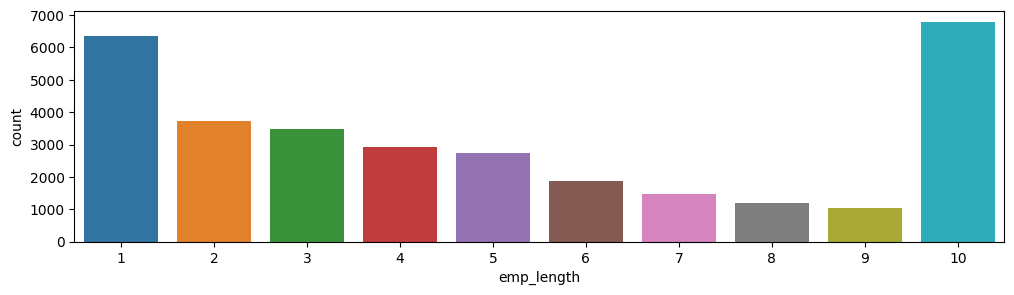

In [18]:
# Analyzing emp_length
plt.figure(figsize=[12,3])
sns.countplot(data=loan_data, x='emp_length')
plt.show()

#### Inference: Most of the loans are borrwed by applicants having 10+ years of emp experience followed by people having less than one year emp experience

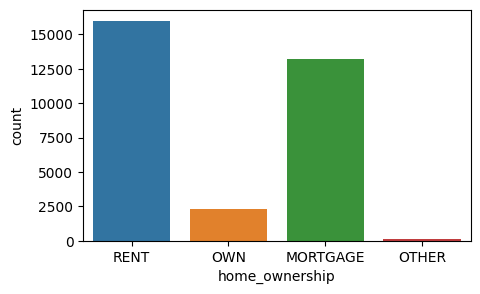

In [19]:
# Analyzing home_ownership
plt.figure(figsize=[5,3])
sns.countplot(data=loan_data, x='home_ownership')
plt.show()

#### Inference: Most of the loans are borrwed by applicants living in rented house followed by mortgage

Not Verified       14193
Verified            9130
Source Verified     8280
Name: verification_status, dtype: int64


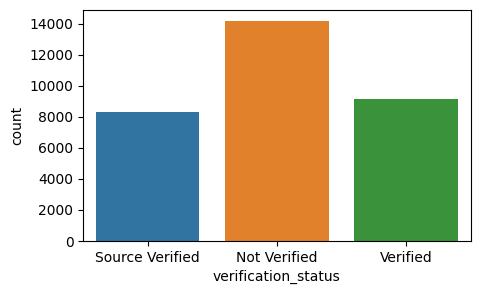

In [20]:
# Analyzing verification_status
print(loan_data['verification_status'].value_counts())
plt.figure(figsize=[5,3])
sns.countplot(data=loan_data, x='verification_status')
plt.show()

#### Inference: Appx. 44% of loans are given without verifying the status

December     3412
November     3265
October      2998
September    2867
August       2828
July         2818
June         2631
May          2483
April        2409
March        2169
January      1884
February     1839
Name: issue_d_month, dtype: int64


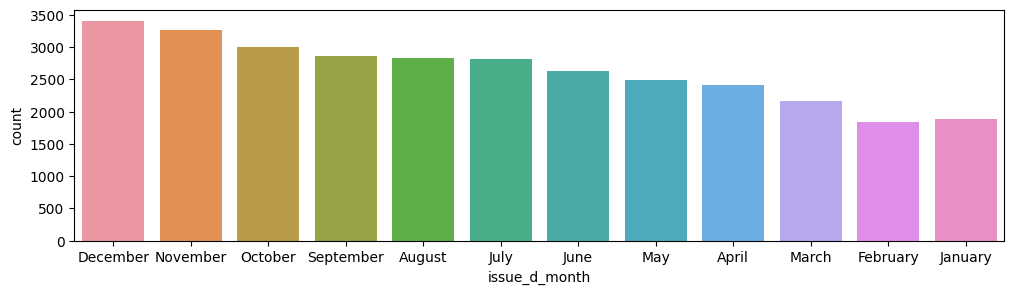

In [21]:
# Analyzing issue_d_month
print(loan_data['issue_d_month'].value_counts())
plt.figure(figsize=[12,3])
sns.countplot(data=loan_data, x='issue_d_month')
plt.show()

#### Inference: Most of the loans are approved in the month of December followed by November

2011    16554
2010     9953
2009     4110
2008      980
2007        6
Name: issue_d_year, dtype: int64


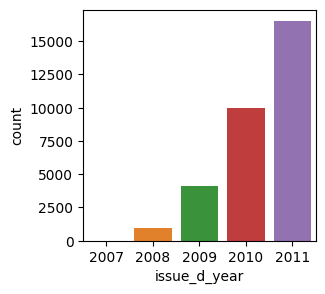

In [22]:
# Analyzing issue_d_year
print(loan_data['issue_d_year'].value_counts())
plt.figure(figsize=[3,3])
sns.countplot(data=loan_data, x='issue_d_year')
plt.show()

#### Inference: Most of the loans are given in 2011

debt_consolidation    15134
credit_card            4147
other                  3187
home_improvement       2122
major_purchase         1809
car                    1317
small_business         1126
wedding                 790
medical                 567
moving                  473
vacation                313
house                   279
educational             264
renewable_energy         75
Name: purpose, dtype: int64


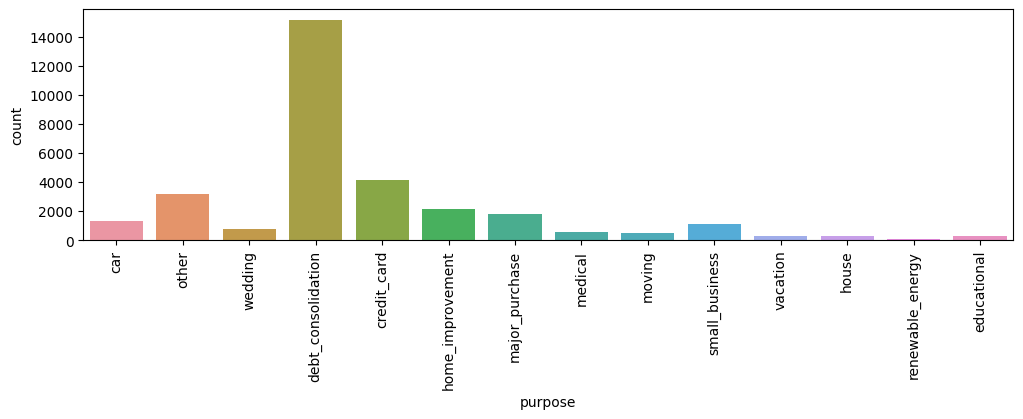

In [23]:
# Analyzing issue_d_year
print(loan_data['purpose'].value_counts())
plt.figure(figsize=[12,3])
plt.xticks(rotation = 90)
sns.countplot(data=loan_data, x='purpose')
plt.show()

#### Inference: Most of the loans are given for debt consolidation purpose

### Segmented univariate analysis

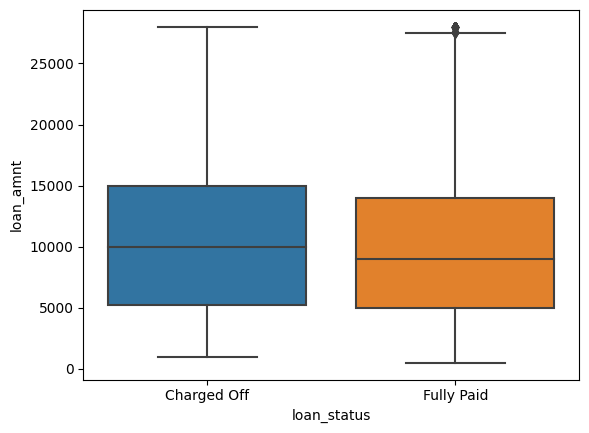

<Figure size 300x300 with 0 Axes>

In [24]:
#1.  Analyze loan amount for different loan status
# print(loan_data[loan_data['loan_status'] == 'Charged Off']['loan_amnt'].describe())
# print(loan_data[loan_data['loan_status'] == 'Fully Paid']['loan_amnt'].describe())
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.figure(figsize=[3,3])
plt.show()

#### Inference: 25th percentile, mean, 75th percentile and max loan amount of fully paid and charged off is almost same - differences are negligible

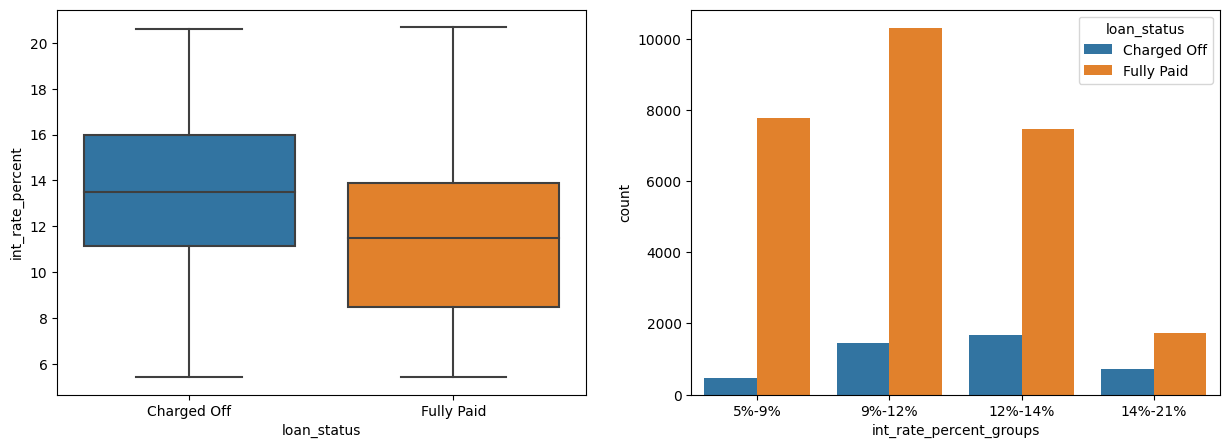

In [25]:
#2. Analyze loan amount for different loan status
plt.figure(figsize=[15,5])
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='int_rate_percent', data=loan_data)

loan_data['int_rate_percent_groups'] = pd.cut(loan_data['int_rate_percent'], bins=4,precision =0,labels=['5%-9%','9%-12%','12%-14%','14%-21%'])
plt.subplot(1, 2, 2)
sns.countplot(x='int_rate_percent_groups', data=loan_data, hue='loan_status')
plt.show()

#### Inference: Defaulters rate is high for higher interest rates. To be more specific, 12-14% interest rates have high defaulters rate

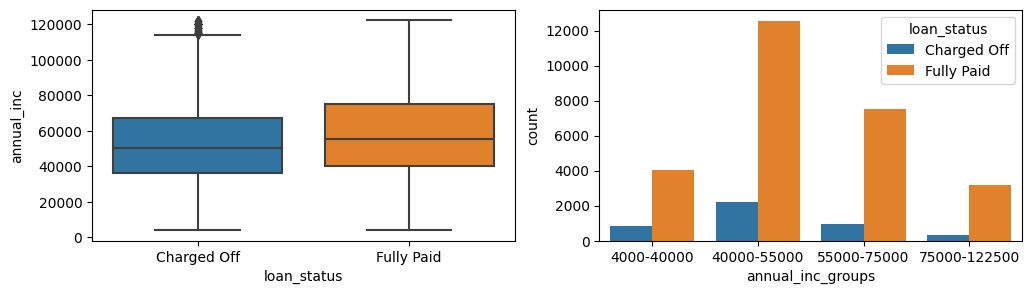

In [26]:
#3. Analyze loan amount for different loan status
plt.figure(figsize=[12,3])
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data)


loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=4,precision =0,labels=['4000-40000','40000-55000','55000-75000','75000-122500'])
plt.subplot(1, 2, 2)
sns.countplot(x='annual_inc_groups', data=loan_data, hue='loan_status')
plt.show()


#### Inference: In 25th percentile, mean and 75th percentile, persons with less annual income have higher number of defaulters.
#### To be more specific, annual income between 40K-55K have more defaulters

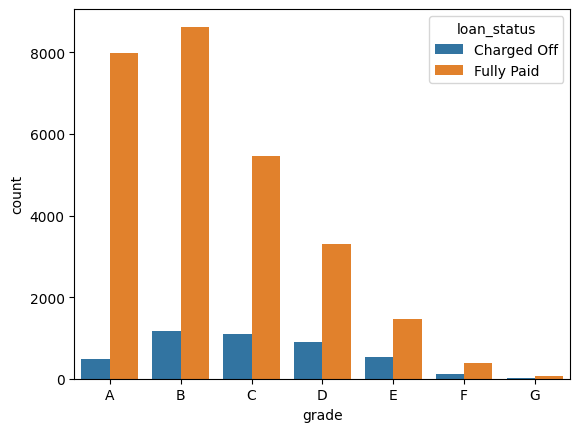

In [27]:
#4. Analyze grade for different loan status
sns.countplot( x="grade", hue='loan_status', data=loan_data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

#### Inference: Loan grades B and C have more defaulters than other grades

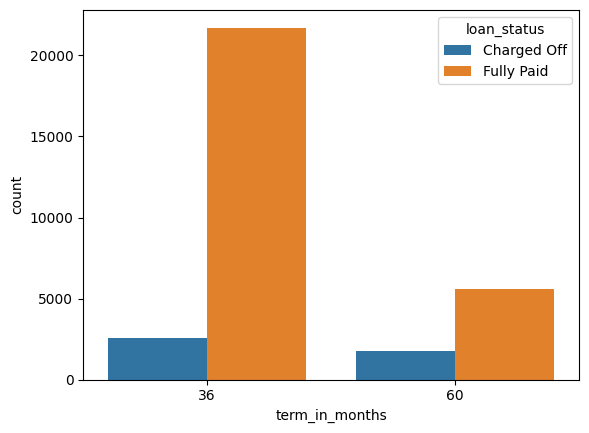

In [28]:
#5. Analyze term (in months) for different loan status
sns.countplot( x="term_in_months", hue='loan_status', data=loan_data)
plt.show()

#### Inference: 36 months (term) tend to have more defaulters comparing to 60 months term

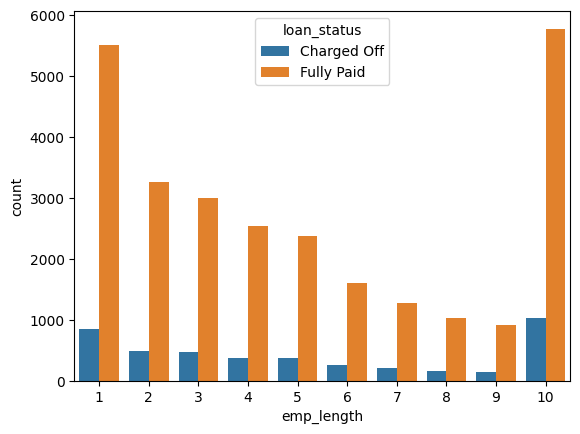

In [29]:
#5. Analyze emp_length for different loan status
sns.countplot( x="emp_length", hue='loan_status', data=loan_data)
plt.show()

#### Inference: Most no. of defaulters are having more than 10 years of employment followed by less than one year of employment

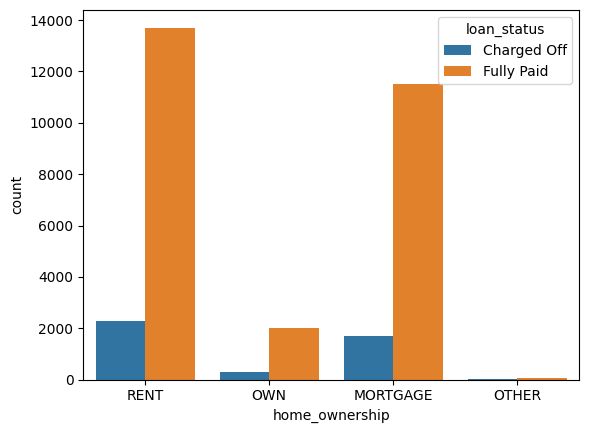

In [30]:
#6. Analyze home_ownership for different loan status
sns.countplot( x="home_ownership", hue='loan_status', data=loan_data)
plt.show()

#### Inference: Most no.of defaulters are having rented house followed by mortgage

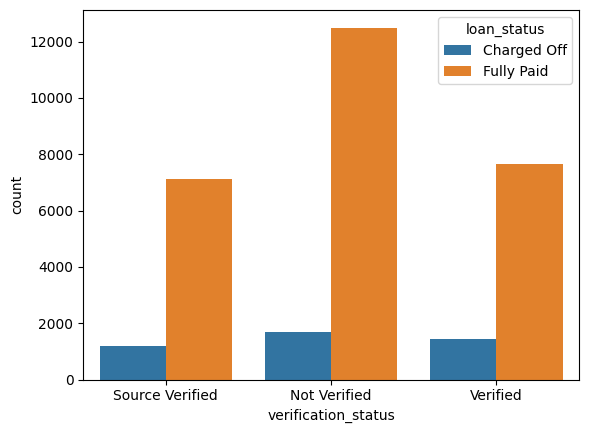

In [31]:
#7. Analyze verification_status for different loan status
sns.countplot( x="verification_status", hue='loan_status', data=loan_data)
plt.show()

#### Inference: Most no.of defaulters are whose income was not verified

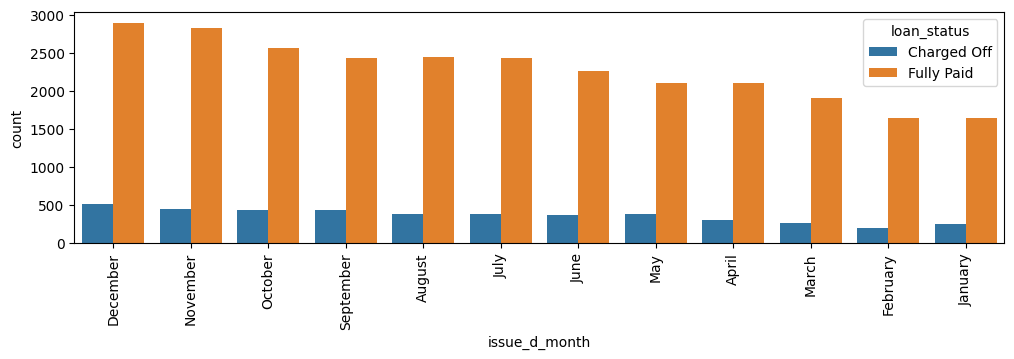

In [32]:
#8. Analyze issue_d_month for different loan status
plt.figure(figsize=[12,3])
plt.xticks(rotation = 90)
sns.countplot( x="issue_d_month", hue='loan_status', data=loan_data)
plt.show()

#### Inference: Most of the defaulters got loan in the month of December followed by November

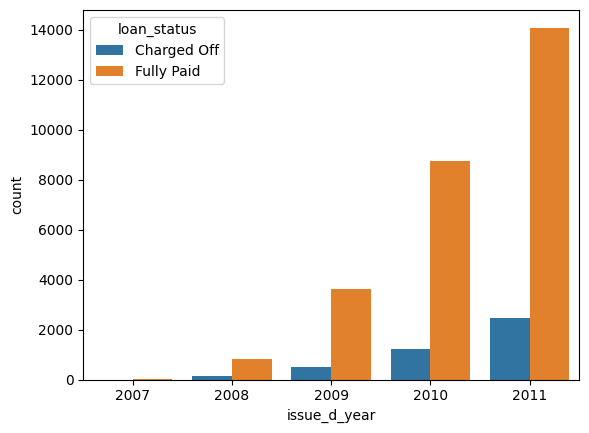

In [33]:
#9. Analyze issue_d_year for different loan status
sns.countplot( x="issue_d_year", hue='loan_status', data=loan_data)
plt.show()

#### Inference: No.of defaulters are increasing every year. 2011 tops the max no.of defaulters list

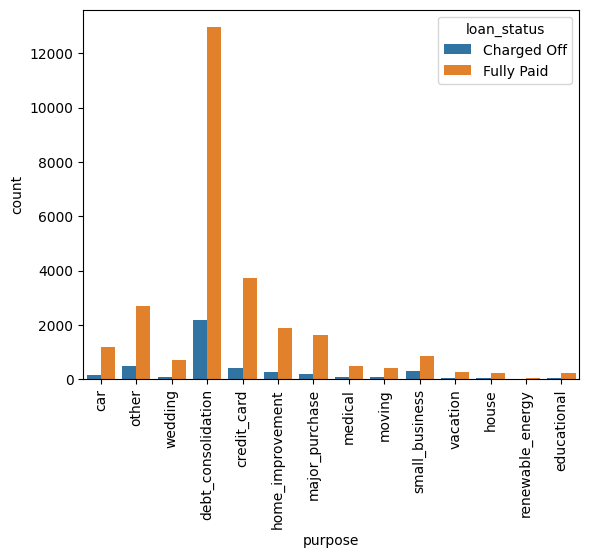

In [34]:
#10. Analyze purpose for different loan status
sns.countplot( x="purpose", hue='loan_status', data=loan_data)
plt.xticks(rotation = 90)
plt.show()

#### Inference: Most no. of defaulters got loan for the purpose of debt consolidation

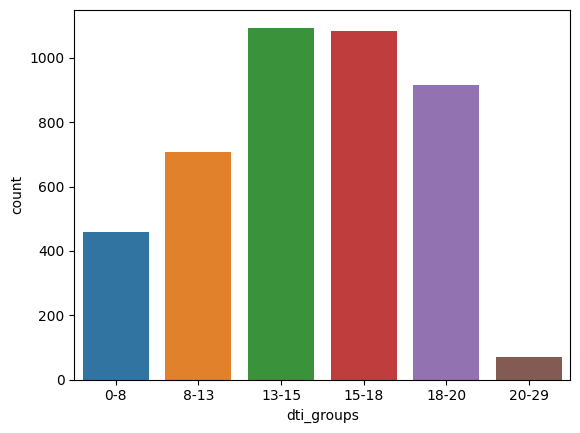

In [35]:
#11. Analyze dti for different loan status

loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=6,precision =0,labels=['0-8','8-13','13-15', '15-18', '18-20', '20-29'])

sns.countplot(x='dti_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.show()

#### Inference: Applicant with an average dti (13-15) tend to fall in defaulters category

### Observations at the end of univariate and segmented univariate analysis
#### In the following scenarios, the probability of defaulting is high

1. When the employment length is greater than 10 year or less than 1 year
2. When the home ownership is rent or mortgage
3. When the annual income is between 44K and 55K
4. When annual income is not verified (verification_status column)
5. When the loan purpose is debt consolidation
6. When the dti is between 13-18
7. When the loan issue month (issue_d_month) is in the last quarter of the year (October, November and December)

### Bivariate analysis

In [36]:
# Considering only the charged-off loan applicants
loan_data['loan_status_in_int'] = loan_data['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)


# For plotting values
def convert_grade_to_int(grade):
    if grade == 'A':
        return 1
    elif grade == 'B':
        return 2
    elif grade == 'C':
        return 3
    elif grade == 'D':
        return 4
    elif grade == 'E':
        return 5
    elif grade == 'F':
        return 6
    
loan_data['grade_in_int'] = loan_data['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)


columns_for_analysis = ['loan_status_in_int', 'loan_amnt', 'grade_in_int', 'term_in_months', 'int_rate_percent',
                        'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                        'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
                        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                        'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
                        'issue_d_year', 'last_pymnt_d_year', 'last_credit_pull_d_year'
                       ]


In [37]:
corr = loan_data[columns_for_analysis].corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_status_in_int,loan_amnt,grade_in_int,term_in_months,int_rate_percent,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,last_pymnt_d_year,last_credit_pull_d_year
loan_status_in_int,1.000000,0.048517,1.000000,0.169379,0.196531,0.013062,0.017910,-0.076688,0.040733,0.012106,0.065960,-0.004524,0.050400,0.013444,-0.017509,-0.256602,-0.254911,-0.349628,0.002190,0.162050,0.346099,0.193888,-0.225493,0.044640,0.025531,-0.197135,-0.037983
loan_amnt,0.048517,1.000000,0.048517,0.301333,0.228210,0.925687,0.133275,0.359413,0.094023,-0.050861,-0.005862,0.161304,-0.038509,0.305746,0.223533,0.880919,0.852422,0.850482,0.709464,0.027233,0.117013,0.066617,0.428455,-0.021894,0.055779,0.073472,0.050630
grade_in_int,1.000000,0.048517,1.000000,0.169379,0.196531,0.013062,0.017910,-0.076688,0.040733,0.012106,0.065960,-0.004524,0.050400,0.013444,-0.017509,-0.256602,-0.254911,-0.349628,0.002190,0.162050,0.346099,0.193888,-0.225493,0.044640,0.025531,-0.197135,-0.037983
term_in_months,0.169379,0.301333,0.169379,1.000000,0.397051,0.023645,0.092900,0.048439,0.074583,0.000982,0.042306,0.033709,0.015471,0.053059,0.078847,0.267253,0.281680,0.161788,0.499385,0.006294,0.100831,0.031931,0.242678,0.021383,0.205276,0.310349,0.131401
int_rate_percent,0.196531,0.228210,0.196531,0.397051,1.000000,0.214598,-0.018850,0.006243,0.105367,0.152892,0.135580,-0.028198,0.108874,0.059552,-0.091689,0.236289,0.229486,0.123340,0.496395,0.088891,0.112791,0.063679,0.124652,0.089672,-0.014211,0.031679,0.046203
installment,0.013062,0.925687,0.013062,0.023645,0.214598,1.000000,0.104573,0.353681,0.081749,-0.037677,-0.005371,0.153352,-0.032767,0.298108,0.193145,0.854164,0.820554,0.849611,0.614428,0.039720,0.095653,0.066720,0.365152,-0.018684,0.003651,-0.013581,0.021757
emp_length,0.017910,0.133275,0.017910,0.092900,-0.018850,0.104573,1.000000,0.200174,0.049741,0.011863,0.011647,0.095912,0.072138,0.158131,0.214720,0.114630,0.122495,0.107896,0.098959,-0.017041,0.022619,0.008822,0.072799,0.068548,0.091329,0.074124,0.065873
annual_inc,-0.076688,0.359413,-0.076688,0.048439,0.006243,0.353681,0.200174,1.000000,-0.072631,0.022415,0.030545,0.261046,0.004655,0.378962,0.382145,0.341505,0.328639,0.347594,0.226254,-0.004954,0.019671,0.009034,0.187996,0.008667,0.021191,0.008239,0.033000
dti,0.040733,0.094023,0.040733,0.074583,0.105367,0.081749,0.049741,-0.072631,1.000000,-0.031749,0.008702,0.300796,-0.008780,0.274369,0.244679,0.087323,0.090259,0.066197,0.123507,-0.011295,0.025042,0.009756,0.024106,0.003818,0.079964,0.087619,0.102784
delinq_2yrs,0.012106,-0.050861,0.012106,0.000982,0.152892,-0.037677,0.011863,0.022415,-0.031749,1.000000,0.006423,0.014352,0.014429,-0.066896,0.065682,-0.040670,-0.044309,-0.052577,0.004935,0.024656,0.008834,0.008377,-0.019828,0.009156,0.003113,-0.005515,-0.006176


#### Inference: grade is strongly/perfectly correlated with loan_status
#### loan amount has a positive correlation with installment - corr val: ~0.92

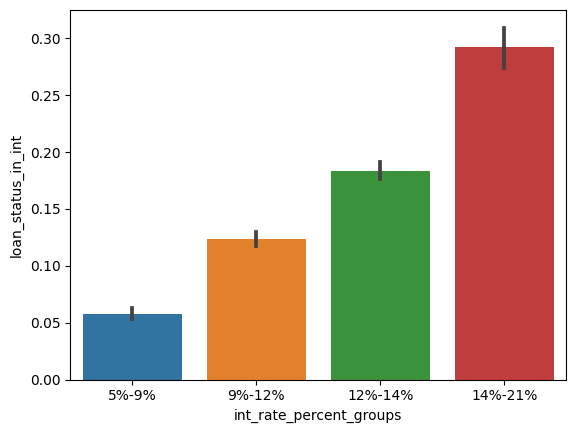

In [38]:
sns.barplot(data=loan_data, x='int_rate_percent_groups', y='loan_status_in_int')
plt.show()

In [39]:
#### Inference: Loan with higher interest rates (14-21%) tend to have more defaulters

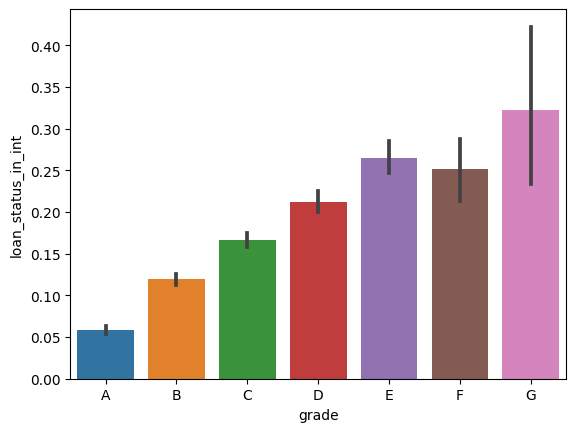

In [40]:
sns.barplot(data=loan_data, x='grade', y='loan_status_in_int', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

#### Inference: Loan applicants with low grades have higher chances of becoming defaulters

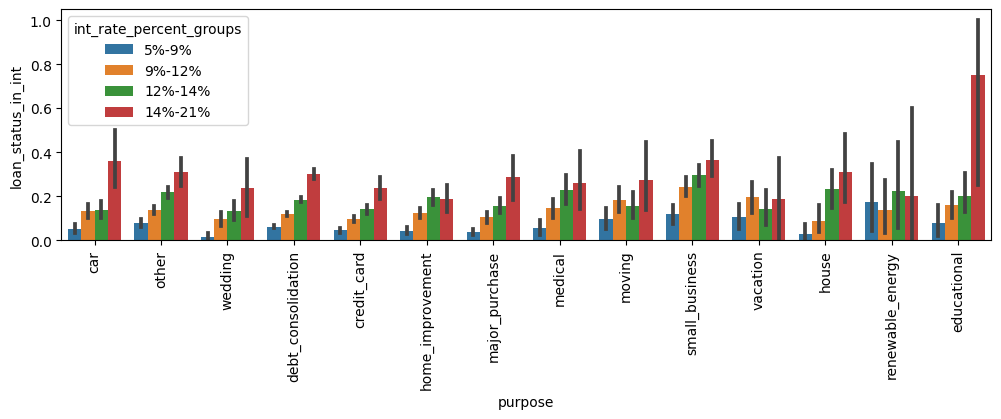

In [41]:
plt.figure(figsize=[12,3])
plt.xticks(rotation = 90)
sns.barplot(data=loan_data, x='purpose', y='loan_status_in_int', hue='int_rate_percent_groups')
plt.show()

#### Inference: Loan applied for educational purpose with higher interest rate (14 - 21%) tend to have more defaulters

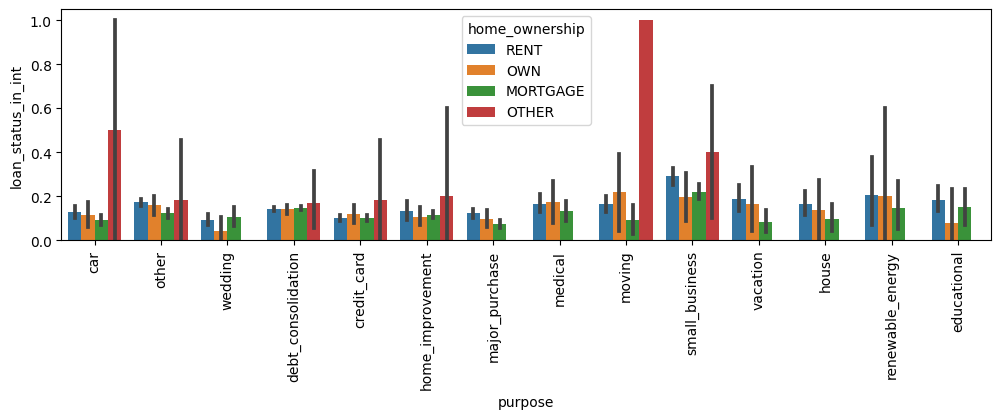

In [42]:
plt.figure(figsize=[12,3])
plt.xticks(rotation = 90)
sns.barplot(data=loan_data, x='purpose', y='loan_status_in_int', hue='home_ownership')
plt.show()

#### Inference: Loan applied for moving purpose tend to have more defaulters

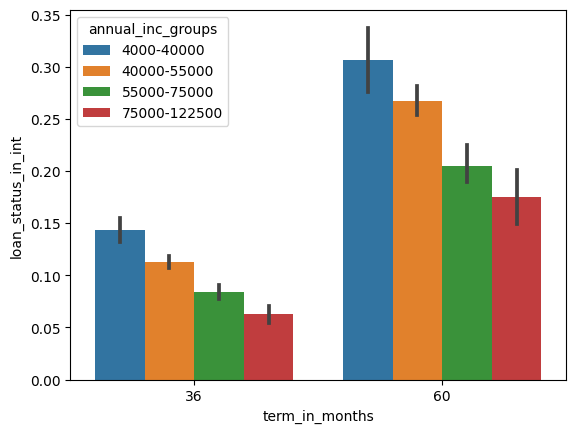

In [43]:
sns.barplot(data=loan_data, x='term_in_months', y='loan_status_in_int', hue='annual_inc_groups')
plt.show()

#### Inference: Loan with 60 months term tend to have more defaulters particularly people having annual income in the range of 4000 to 40K

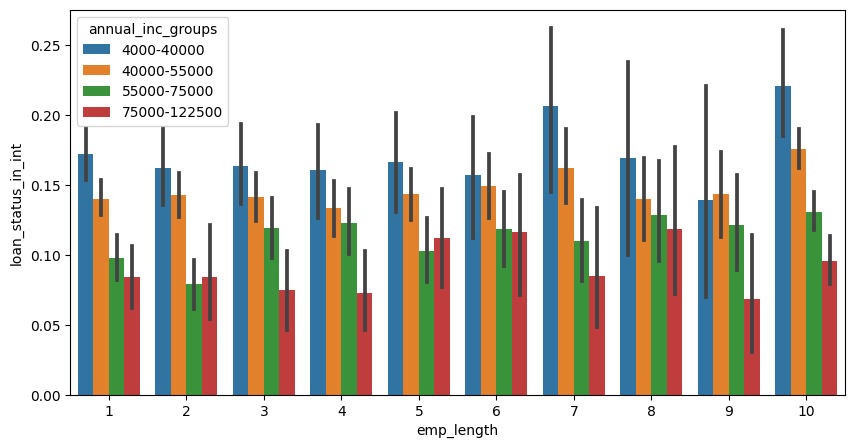

In [44]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_data, x='emp_length', y='loan_status_in_int', hue='annual_inc_groups')
plt.show()

#### Inference: Loan applied by people with 10+ years of experience and having annual income in the range of 4k-40k have high chances of becoming defaulters

<h1 style="background-color:powderblue;">Summary</h1>

#### Following are some of the driving factors / variables behind loan default
1. grade <br>
2. int_rate <br>
3. purpose <br>
4. annual_inc <br>
5. emp_length <br>


##### Tidbits on the above variables
- Loan applicants with low grades have higher chances of becoming defaulters
- Loan applied for educational purpose with higher interest rate (14 - 21%) tend to have more defaulters
- Loan applied for 'moving' purpose tend to have more defaulters
- Loan with 60 months term tend to have more defaulters particularly people having annual income in the range of 4000 to 40K
- Loan applied by people with 10+ years of experience and having annual income in the range of 4k-40k have high chances of becoming defaulters